<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')           
df.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В таблице содержится 23699 записей и 22 столбца с разными типами данных. Много пустых значений, которые необходимо заменить или удалить.

## Предобработка данных

In [5]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В таблице много пропущенных значений. Часть данных, такие как информация по аэропортам, паркам и прудам рядом, можно оставить пустыми. Они нам не понадобятся в исследовании. 
С остальным надо поработать.
Пустые значения в данных объявлению могли появится из-за присутствия необязательных полей для заполнения при размещении объявлений. Пустые данные в картографических показателях возможно говорят об отсутствии данных объектов рядом с квартирой.  

In [6]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].head()

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
Name: ceiling_height, dtype: float64

Высота потолков ни от каких имеющихся данных не зависит, заполним медианным значением.

In [7]:
df.dropna(subset=['floors_total'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               12133 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Столбец с общим количеством этажей нам понадобится в дальнейшем, пропущенных значений в нем мало, и у нас нет данных для заполнений этих значений.
Удалим строки с пропущенными значениями.

In [8]:
print(len(df[(df['living_area'] + df['kitchen_area']) > df['total_area']]))

64


In [9]:
df = df.drop(df[(df['living_area'] + df['kitchen_area']) > df['total_area']].index)

Проверили, есть ли квартиры, у которых жилая площадь и площадь кухни в сумме больше общей площади. Удалили такие объявления. Их доля небольшая, но данные в них, вероятнее всего, внесены некорректно.

In [10]:
df['living_area'] = df['living_area'].fillna(df.groupby('total_area')['living_area'].transform('median')) 
df['living_area'].head(10)

0    51.00
1    18.60
2    34.30
3    95.00
4    32.00
5    14.40
6    10.60
7    44.30
8    15.43
9    43.60
Name: living_area, dtype: float64

Жилая площадь больше всего зависит от общей площади. Сгруппировали площадь по общей, расчитали медианные значения жилой площади и заполнили пустые значения.

In [13]:
index_area = round((df['living_area'] / df['total_area']).median(), 3)
index_area

0.571

In [14]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * index_area) 
df['living_area'].describe()

count    23549.000000
mean        34.620508
std         22.463841
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Но у нас остались еще пустые значения. Расчитали средний коэффициент доли жилой площади в общей и заполнили оставшиеся пустые данные.

In [15]:
print(len(df[(df['living_area'] + df['kitchen_area']) > df['total_area']]))

9


In [16]:
df = df.drop(df[df['living_area'] + df['kitchen_area'] > df['total_area']].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23540 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23540 non-null  int64  
 1   last_price            23540 non-null  float64
 2   total_area            23540 non-null  float64
 3   first_day_exposition  23540 non-null  object 
 4   rooms                 23540 non-null  int64  
 5   ceiling_height        23540 non-null  float64
 6   floors_total          23540 non-null  float64
 7   living_area           23540 non-null  float64
 8   floor                 23540 non-null  int64  
 9   is_apartment          2756 non-null   object 
 10  studio                23540 non-null  bool   
 11  open_plan             23540 non-null  bool   
 12  kitchen_area          21309 non-null  float64
 13  balcony               12085 non-null  float64
 14  locality_name         23492 non-null  object 
 15  airports_nearest   

После заполнения жилой площади еще раз проверили, есть ли объявления с некорректно расчитанной площадью. Таких объявлений осталось 9. Удалили эти строки.

In [17]:
rest_area = (df['kitchen_area'] / (df['total_area'] - df['living_area'])).median()
print(rest_area)

0.4117647058823529


In [18]:
df['kitchen_area'] = df['kitchen_area'].fillna((df['total_area'] - df['living_area']) * rest_area)
df['kitchen_area'].describe()

count    23540.000000
mean        10.452228
std          6.047784
min          0.000000
25%          7.000000
50%          9.000000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

Расчитали медианное отношение площади кухни к нежилой площади квартиры. Заполнили пропущенные значения площади кухни, используя этот индекс.

In [19]:
print(len(df[df['kitchen_area'] + df['living_area'] > df['total_area']]))

0


In [20]:
df['locality_name'].isnull().sum()
df['locality_name'] = df['locality_name'].fillna('Unknown') 

Доля пустых значений совсем маленькая, найти названия мы никак не можем, поэтому заменим данные на Unknown

In [21]:
df['days_exposition'] = df['days_exposition'].fillna(0)
df['days_exposition'].describe()

count    23540.000000
mean       156.671198
std        213.596240
min          0.000000
25%         22.000000
50%         73.500000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Пустые дни в данном столбце могут говорить и о том, что объявление еще не снято на момент выгрузки, и о том, что, может, оно автоматически снято системой, а значит не факт, что квартира продана. лучше данные заполнить нулями, и исключать при дальнейшем исследовании.

Остальные значения нам не понадобятся для исследований, оставим их незаполненными. 

In [22]:
df['locality_name'].value_counts()
def names(places):
    for words in places.split():
        if words[0].isupper():
            return words
df['locality_name'] = df['locality_name'].apply(names) 


Для дальнейшего исследования отбросили типы населенных пунктов и оставили только названия с заглавной буквы.

In [23]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

Перевели дату объявления в нужный формат.

In [24]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23540 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23540 non-null  int64         
 1   last_price            23540 non-null  float64       
 2   total_area            23540 non-null  float64       
 3   first_day_exposition  23540 non-null  datetime64[ns]
 4   rooms                 23540 non-null  int64         
 5   ceiling_height        23540 non-null  float64       
 6   floors_total          23540 non-null  float64       
 7   living_area           23540 non-null  float64       
 8   floor                 23540 non-null  int64         
 9   is_apartment          2756 non-null   object        
 10  studio                23540 non-null  bool          
 11  open_plan             23540 non-null  bool          
 12  kitchen_area          23540 non-null  float64       
 13  balcony         

In [25]:
df_int = df.select_dtypes(include = ['int'])
df_float = df.select_dtypes(include = ['float'])

converted_int = df_int.apply(pd.to_numeric, downcast = 'unsigned')
converted_float = df_float.apply(pd.to_numeric, downcast = 'float')

df[converted_int.columns] = converted_int
df[converted_float.columns] = converted_float
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23540 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23540 non-null  uint8         
 1   last_price            23540 non-null  float32       
 2   total_area            23540 non-null  float32       
 3   first_day_exposition  23540 non-null  datetime64[ns]
 4   rooms                 23540 non-null  uint8         
 5   ceiling_height        23540 non-null  float32       
 6   floors_total          23540 non-null  float32       
 7   living_area           23540 non-null  float32       
 8   floor                 23540 non-null  uint8         
 9   is_apartment          2756 non-null   object        
 10  studio                23540 non-null  bool          
 11  open_plan             23540 non-null  bool          
 12  kitchen_area          23540 non-null  float32       
 13  balcony         

In [26]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,NaN,...,11.000000,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14.0,95.000000,9,NaN,...,26.352942,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.400000,2018-09-10,1,2.65,12.0,14.400000,5,NaN,...,9.100000,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.299999,2017-11-02,1,2.65,26.0,10.600000,6,NaN,...,14.400000,1.0,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.599998,2019-04-18,2,2.65,24.0,44.299999,22,NaN,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0
8,20,2900000.0,33.160000,2018-05-23,1,2.65,27.0,15.430000,26,NaN,...,8.810000,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,NaN,...,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [27]:
df['last_price'] = df['last_price'].astype('int')
df['last_price'].head()

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
Name: last_price, dtype: int32

Заменили пустые данные в столбцах, которые нам будут нужны для исследований.
Данные по жилой площади заполнили, расчитав медианную долю жилой площади от общей. 
Данные по площади кухни заполнили по медиане площади кухни в общей площаде.
Высота потолков в квартирах в среднем более-менее одинаковая, заполнили данные по медианным значениям.
Так же привели данные к нужному нам типу.
В столбце с датой изменили тип данных с object на datetime для дальнейшей работы с ним.
Данные с наличием балконов, типом апартаментов, наличием прудов, аэропортов и парков рядом, оставили пустыми. Они нам не понадобятся, и у нас нет данных, на основе которых их можно заменить. 

## Расчёты и добавление результатов в таблицу

In [28]:
df['price_for_meter'] = df['last_price'] / df['total_area'] 

In [29]:
df['year'] = df['first_day_exposition'].dt.year 

In [30]:
df['month'] = df['first_day_exposition'].dt.month 

In [31]:
df['day'] = df['first_day_exposition'].dt.day_name() 
df['day'].head()

0    Thursday
1     Tuesday
2    Thursday
3      Friday
4     Tuesday
Name: day, dtype: object

In [32]:
def floors_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'first'
    if floor == floors_total:
        return 'last'
    return 'other'

df['floors_type'] = df.apply(floors_type, axis=1)
df['floors_type'].value_counts()

other    17308
last      3322
first     2910
Name: floors_type, dtype: int64

In [33]:
df['living_to_total'] = df['living_area'] / df['total_area'] 
df['living_to_total'].head(10)

0    0.472222
1    0.460396
2    0.612500
3    0.597484
4    0.320000
5    0.473684
6    0.284182
7    0.618715
8    0.465320
9    0.714754
Name: living_to_total, dtype: float32

In [34]:
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area'] 
df['kitchen_to_total'].head(10)

0    0.231481
1    0.272277
2    0.148214
3    0.165742
4    0.410000
5    0.299342
6    0.386059
7    0.263966
8    0.265682
9    0.106557
Name: kitchen_to_total, dtype: float32

Провели расчеты и добавили требуемые по заданию столбцы в таблицу.

## Исследовательский анализ данных

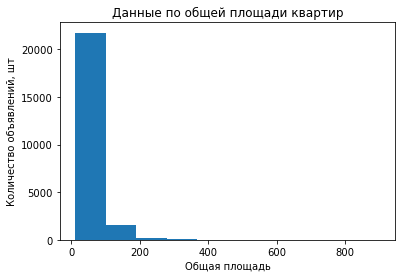

In [35]:
df['total_area'].plot(kind='hist',title = 'Данные по общей площади квартир')
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Общая площадь')
plt.show()

На графике видно, что почти все объявления на квартиры площадью до 100 метров. Но так же есть объявления с квартирами выше 600 метров, на графике их совсем не видно.

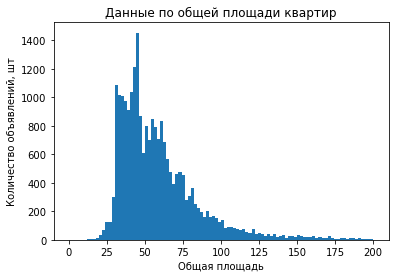

In [36]:
df['total_area'].plot(kind = 'hist', bins=100, range=(0, 200), title = 'Данные по общей площади квартир')
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Общая площадь')
plt.show()

Сократили диапозон по площади. Теперь видно более детально. Больше всего объявлений с общей площадью квартир в районе 40-45 метров.

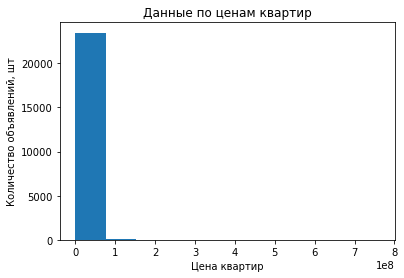

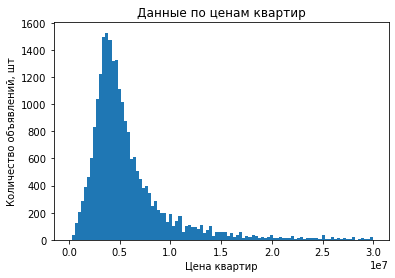

In [37]:
df['last_price'].plot(kind='hist', title = 'Данные по ценам квартир')
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Цена квартир')
plt.show()

df['last_price'].plot(kind='hist',title = 'Данные по ценам квартир', bins=100, range=(0, 30000000))
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Цена квартир')
plt.show()

На первом графике видно только то, что большинство квартир стоят до 15 млн.руб. 
На втором графике увеличили число корзин и сократили диапозон цены. Теперь видно, что больше всего квартир с ценой 4-5 млн.руб.

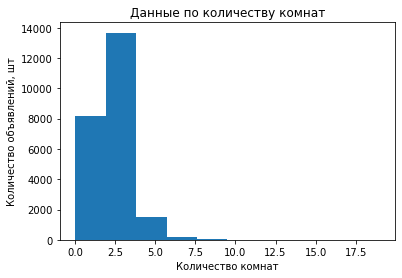

In [38]:
df['rooms'].plot(kind='hist',title = 'Данные по количеству комнат')
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Количество комнат')
plt.show()

Больше всего объявлений с однокомнатными и двухкомнатными квартирами. Так же много продаж трехкомнатных квартир.

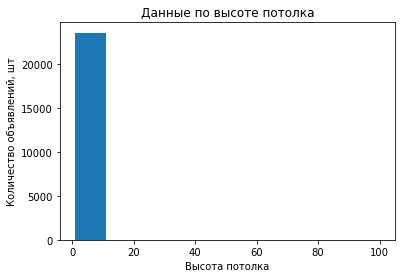

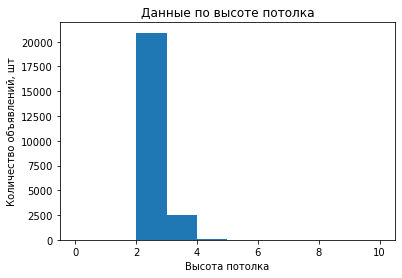

In [39]:
df['ceiling_height'].plot(kind = 'hist', title = 'Данные по высоте потолка')
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Высота потолка')
plt.show()

df['ceiling_height'].plot(kind = 'hist', title = 'Данные по высоте потолка', range=(0,10))
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Высота потолка')
plt.show()

В среднем высота потолков в продоваемых квартирах - от двух до трех метров. Но есть и объявления с высотой потолков 100 метров.
Вероятно, это ошибка в данных.

In [40]:
df[df['days_exposition'] > 0]['days_exposition'].describe()

count    20378.000000
mean       180.981445
std        219.778748
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

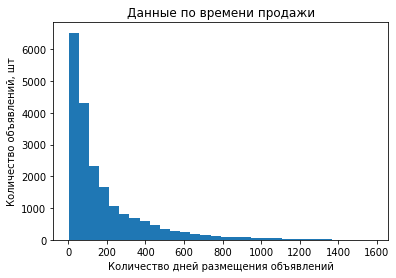

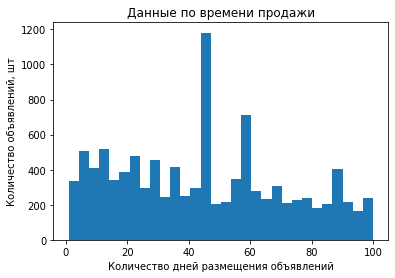

In [39]:
df['days_exposition'].plot(kind = 'hist', bins=30, title = 'Данные по времени продажи', 
                           range = (1, df['days_exposition'].max()))
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Количество дней размещения объявлений')                           
plt.show()

df['days_exposition'].plot(kind = 'hist', bins=30, range = (1, 100), title = 'Данные по времени продажи')
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Количество дней размещения объявлений')                           
plt.show()

Среднее время продажи пол года, медионное значение - три месяца. Чаще всего продажа квартиры занимает не больше 8 месяцев.
Так же есть квартиры, продажи которых заняли от года до почти двух лет. И есть совсем странные объявления, по которым продажи были через три года, после подачи объявления.
Можно считать, что квартира быстро продалась, если продажа заняла менее 1,5 месяцев. Необычайно долгой продажей можно считать продажи, занявшие более 8 месяцев.
Если выделить объявления со сроком продажи до 100 дней, то видно, что чаще всего квартиры продаюся за 45 дней. 

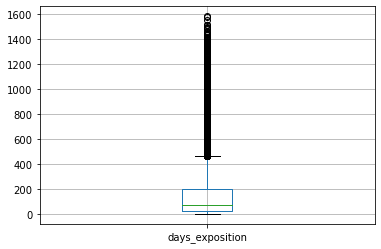

In [41]:
df.boxplot(column = 'days_exposition')
plt.show()

In [42]:
df.query('0 < days_exposition < 500')['days_exposition'].describe()

count    18637.000000
mean       127.158340
std        119.274841
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64

На диаграме размаха видно, что объявления со сроком продажи более 500 дней - очень редкие.
Исключив эти объявления и проведя анализ по получившемуся срезу, видно, что среднее время продажи квартиры изменилось и составило чуть более 4 месяцев.
Медианное значение при этом изменилось не сильно и теперь составляет чуть менее трех месяцев. 

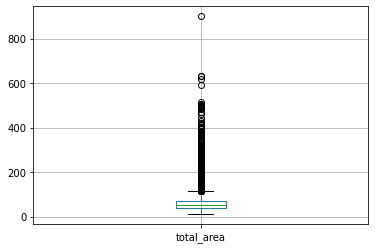

In [43]:
df.boxplot(column='total_area')
plt.show()

In [44]:
len(df[df['total_area'] > 150]) 

563

In [45]:
df = df[df['total_area'] < 150]
df['total_area'].describe()

count    22959.000000
mean        56.482719
std         22.796892
min         12.000000
25%         40.000000
50%         51.000000
75%         67.599998
max        149.600006
Name: total_area, dtype: float64

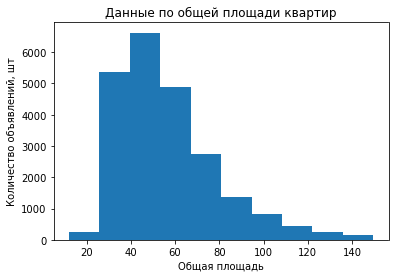

In [46]:
df['total_area'].plot(kind='hist',title = 'Данные по общей площади квартир')
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Общая площадь')
plt.show()

Просмотрев диаграмму распределения, увидели, что объявлений с общей площаью квартир более 150 метров, очень мало.
Убрали из таблицы данные по этим квартирам. Средняя площадь продаваемых квартир слегка изменилась.

In [47]:
df['last_price'].corr(df['total_area']) 

0.6972451562359544

In [48]:
df['last_price'].corr(df['rooms'])

0.4002893972408338

In [49]:
df['last_price'].corr(df['cityCenters_nearest']) 

-0.31439372854019426

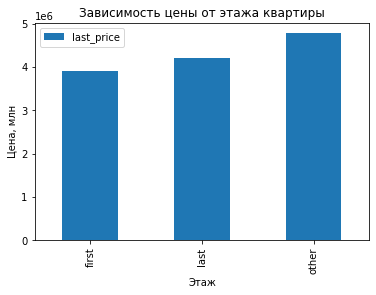

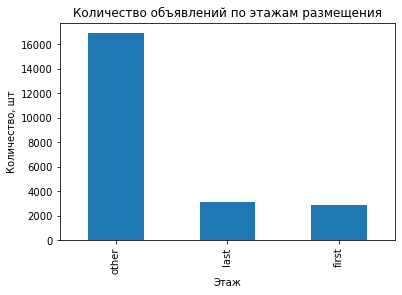

In [50]:
df.pivot_table(index='floors_type', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Зависимость цены от этажа квартиры')
plt.ylabel('Цена, млн')
plt.xlabel('Этаж')
plt.show()   

df['floors_type'].value_counts().plot(
    kind='bar', title = 'Количество объявлений по этажам размещения')
plt.ylabel('Количество, шт')
plt.xlabel('Этаж')
plt.show()   

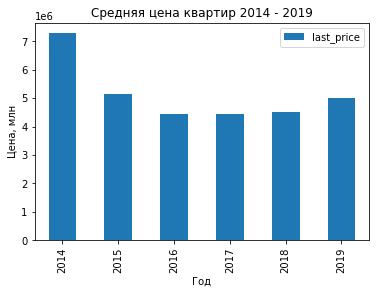

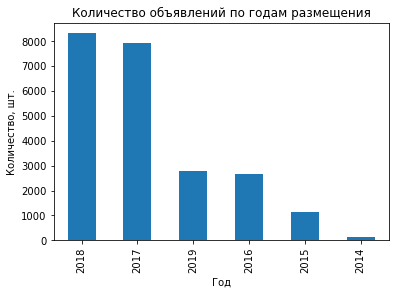

In [51]:
df.pivot_table(index='year', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Средняя цена квартир 2014 - 2019')
plt.ylabel('Цена, млн')
plt.xlabel('Год')
plt.show()   

df['year'].value_counts().plot(
    kind='bar', title = 'Количество объявлений по годам размещения')
plt.ylabel('Количество, шт.')
plt.xlabel('Год')
plt.show()   

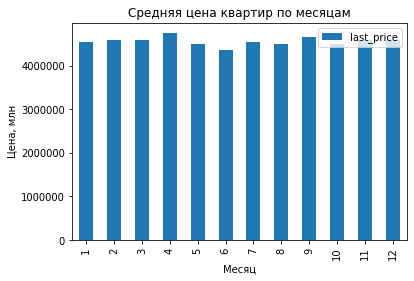

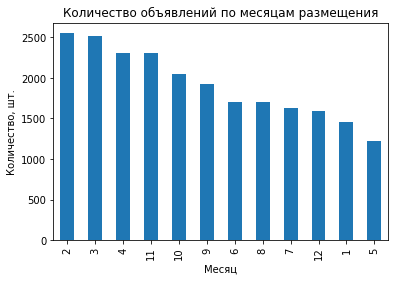

In [51]:
df.pivot_table(index='month', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Средняя цена квартир по месяцам')
plt.ylabel('Цена, млн')
plt.xlabel('Месяц')
plt.show()   


df['month'].value_counts().plot(
    kind='bar', title = 'Количество объявлений по месяцам размещения')
plt.ylabel('Количество, шт.')
plt.xlabel('Месяц')
plt.show()   

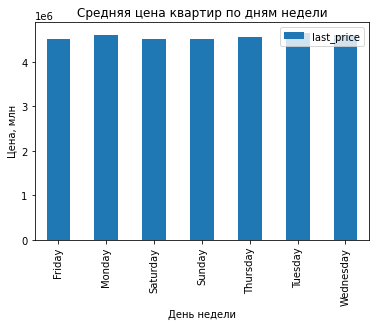

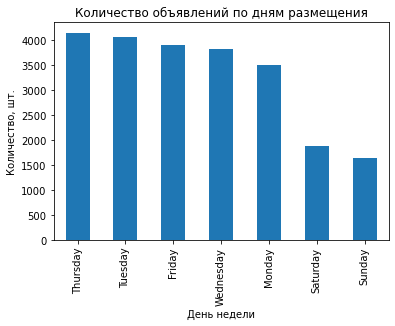

In [52]:
df.pivot_table(index='day', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Средняя цена квартир по дням недели')
plt.ylabel('Цена, млн')
plt.xlabel('День недели')
plt.show()   


df['day'].value_counts().plot(
    kind='bar', title = 'Количество объявлений по дням размещения')
plt.ylabel('Количество, шт.')
plt.xlabel('День недели')
plt.show()   

С увеличением общей площади и количества комнат, цена на квартиру увеличивается. Но это влияние не сильное, очевидно на цену влияют и другие факторы.
Так же цена зависит и от удаленности от центра, чем дальше, тем дешевле, но опять же это влияние не слишком сильное.
Цена зависит и от этажа, на котором расположена квартира. Цена увеличивается, если квартира не на первом и не на последнем этажах. Самые дешевые квартиры на первом этаже.
Если расматривать зависимость от года размещения объявления, то самые дорогие квартиры были в 2014 году, с 2015 года средняя цена на квартиры падает, и только в 2019 есть незначительный рост.
По месяцам средняя цена не сильно не меняется, заметно только не большое снижение в июне. 
От дня недели цена совершенно не зависит.



In [53]:
top_ten_list = pd.DataFrame(df['locality_name'].value_counts().head(10))
display(top_ten_list)  

,locality_name
Санкт-Петербург,15061
Мурино,583
Кудрово,470
Шушары,438
Всеволожск,394
Пушкин,359
Колпино,336
Парголово,325
Гатчина,303
Выборг,234


In [54]:
top_ten = df.query('locality_name in @top_ten_list.index') 
display(top_ten.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,year,month,day,floors_type,living_to_total,kitchen_to_total
0,20,13000000,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,2.0,755.0,0.0,120370.370370,2019,3,Thursday,other,0.472222,0.231481
1,7,3350000,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,NaN,...,0.0,NaN,81.0,82920.788947,2018,12,Tuesday,first,0.460396,0.272277
2,10,5196000,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,NaN,...,2.0,574.0,558.0,92785.714286,2015,8,Thursday,other,0.612500,0.148214
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,1.0,48.0,121.0,100000.000000,2018,6,Tuesday,other,0.320000,0.410000
6,6,3700000,37.299999,2017-11-02,1,2.65,26.0,10.600000,6,NaN,...,0.0,NaN,155.0,99195.712485,2017,11,Thursday,other,0.284182,0.386059


In [55]:
top_ten_meter_price = top_ten.pivot_table(
    index='locality_name', values='price_for_meter').sort_values(by='price_for_meter', ascending=False)
display(top_ten_meter_price)

,price_for_meter
locality_name,
Санкт-Петербург,112207.441651
Пушкин,102866.519522
Кудрово,95260.845996
Парголово,90291.780598
Мурино,85964.231743
Шушары,78546.979054
Колпино,75389.158958
Гатчина,68625.141314
Всеволожск,68590.381343


In [56]:
top_ten_final = top_ten_list.join(top_ten_meter_price)
display(top_ten_final)

,locality_name,price_for_meter
Санкт-Петербург,15061,112207.441651
Мурино,583,85964.231743
Кудрово,470,95260.845996
Шушары,438,78546.979054
Всеволожск,394,68590.381343
Пушкин,359,102866.519522
Колпино,336,75389.158958
Парголово,325,90291.780598
Гатчина,303,68625.141314
Выборг,234,58088.148199


Выделили топ-10 населенных пунктов по количеству объявлений. Просмотрели среднюю цену за квадратный метр в этих населенных пунктах. Самая дорогая стоимость жилья в Санкт-Петербурге, самые дешевые квартиры - в Выборге.

In [57]:
spb_stat = df.query('locality_name == "Санкт-Петербург"') 
spb_stat = spb_stat.dropna(subset =['cityCenters_nearest']) 
spb_stat['cityCenter_km'] = spb_stat['cityCenters_nearest'] / 1000 
spb_stat['cityCenter_km'] = spb_stat['cityCenter_km'].astype('int') 
spb_stat['cityCenter_km'].head()

0    16
2    13
4     8
7    11
9    15
Name: cityCenter_km, dtype: int32

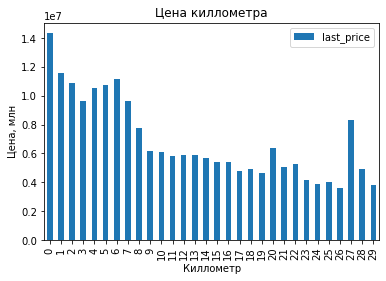

In [58]:
spb_stat.pivot_table(index='cityCenter_km', values='last_price', aggfunc='mean').plot(
    kind='bar', y='last_price', title = 'Цена киллометра')
plt.ylabel('Цена, млн')
plt.xlabel('Киллометр')
plt.show()

In [59]:
spb_center = spb_stat.query('cityCenter_km <= 6')

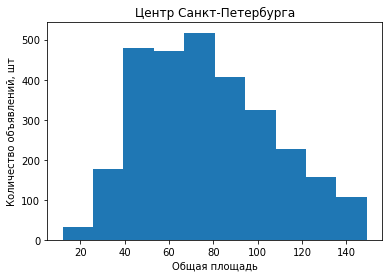

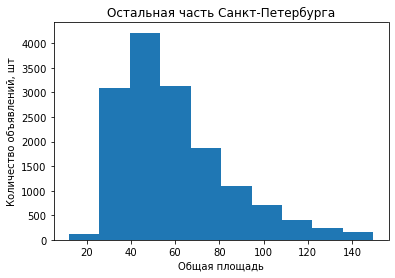

In [60]:
spb_center['total_area'].plot(kind='hist',title = 'Центр Санкт-Петербурга')
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Общая площадь')
plt.show()

spb_stat['total_area'].plot(kind='hist',title = 'Остальная часть Санкт-Петербурга')
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Общая площадь')
plt.show()

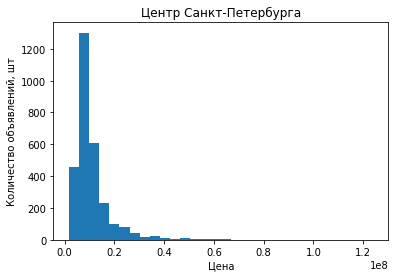

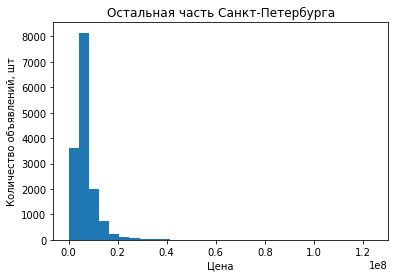

In [61]:
spb_center['last_price'].plot(kind='hist',title = 'Центр Санкт-Петербурга', bins = 30)
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Цена')
plt.show()

spb_stat['last_price'].plot(kind='hist',title = 'Остальная часть Санкт-Петербурга', bins = 30)
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Цена')
plt.show()

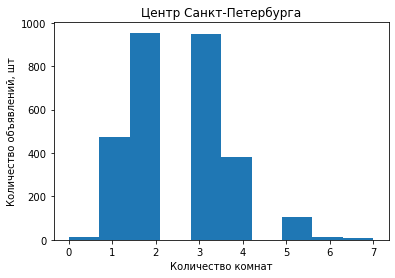

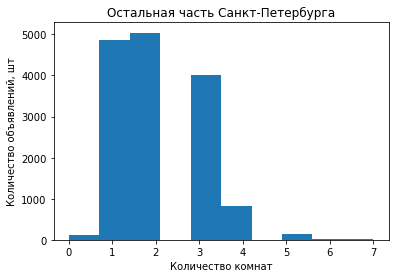

In [61]:
spb_center['rooms'].plot(kind='hist',title = 'Центр Санкт-Петербурга')
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Количество комнат')
plt.show()

spb_stat['rooms'].plot(kind='hist',title = 'Остальная часть Санкт-Петербурга')
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Количество комнат')
plt.show()

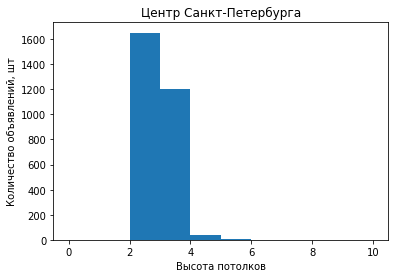

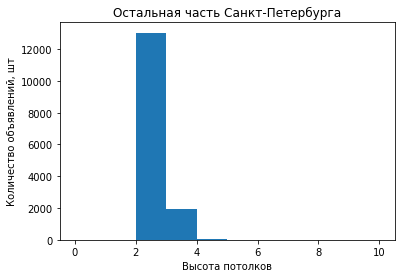

In [63]:
spb_center['ceiling_height'].plot(kind='hist',title = 'Центр Санкт-Петербурга', range=(0,10))
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Высота потолков')
plt.show()

spb_stat['ceiling_height'].plot(kind='hist',title = 'Остальная часть Санкт-Петербурга', range=(0,10))
plt.ylabel('Количество объявлений, шт')
plt.xlabel('Высота потолков')
plt.show()

В центре больше продается квартир с площадью 70-80 метров, в остальной части города площадь продаваемых квартир ниже, самое большое количество объявление приходится на квартиры до 50 квадратных метров.
Так же в центре и более дорогие квартиры.
В центре чаще встречаются продаж двух и трех комнтатных квартир, в остальной части города больше продается однокомнтаных и двухкомнатных квартир.
Так же в центре продается больше квартир с высотой потолка более двух метров, в остальной части города таких квартир значительно меньше.

In [62]:
spb_center['rooms'].corr(spb_center['last_price'])

0.26936382751692156

In [63]:
spb_stat['rooms'].corr(spb_stat['last_price'])

0.41693100052687126

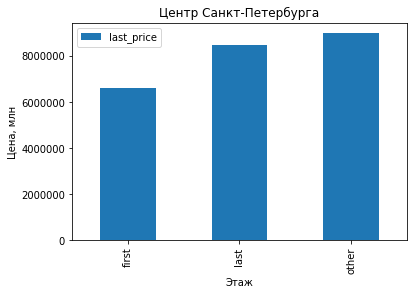

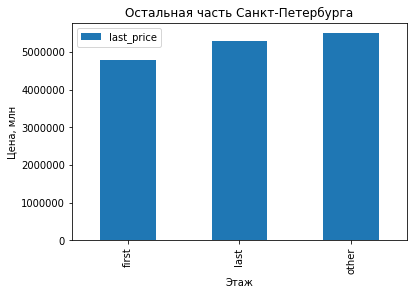

In [66]:
spb_center.pivot_table(index='floors_type', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Центр Санкт-Петербурга')
plt.ylabel('Цена, млн')
plt.xlabel('Этаж')
plt.show()   

spb_stat.pivot_table(index='floors_type', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Остальная часть Санкт-Петербурга')
plt.ylabel('Цена, млн')
plt.xlabel('Этаж')
plt.show()   

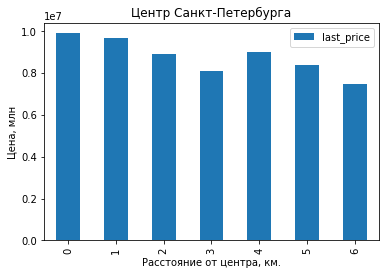

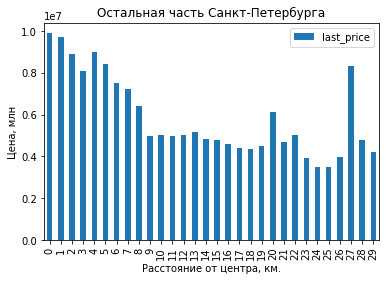

In [67]:
spb_center.pivot_table(index='cityCenter_km', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Центр Санкт-Петербурга')
plt.ylabel('Цена, млн')
plt.xlabel('Расстояние от центра, км.')
plt.show()   

spb_stat.pivot_table(index='cityCenter_km', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Остальная часть Санкт-Петербурга')
plt.ylabel('Цена, млн')
plt.xlabel('Расстояние от центра, км.')
plt.show()   

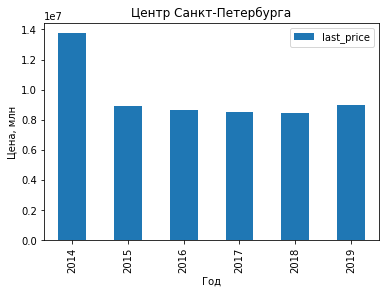

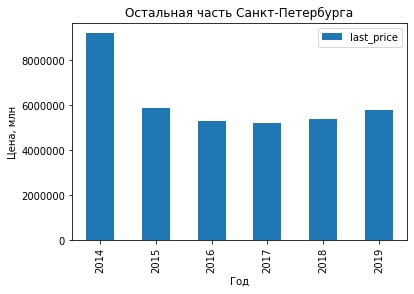

In [68]:
spb_center.pivot_table(index='year', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Центр Санкт-Петербурга')
plt.ylabel('Цена, млн')
plt.xlabel('Год')
plt.show()   

spb_stat.pivot_table(index='year', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Остальная часть Санкт-Петербурга')
plt.ylabel('Цена, млн')
plt.xlabel('Год')
plt.show()   

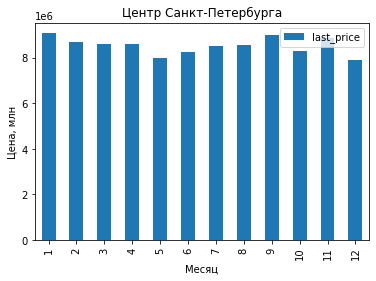

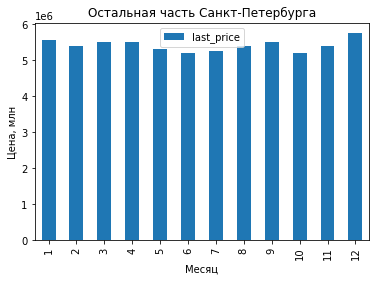

In [64]:
spb_center.pivot_table(index='month', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Центр Санкт-Петербурга')
plt.ylabel('Цена, млн')
plt.xlabel('Месяц')
plt.show()   

spb_stat.pivot_table(index='month', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Остальная часть Санкт-Петербурга')
plt.ylabel('Цена, млн')
plt.xlabel('Месяц')
plt.show()   

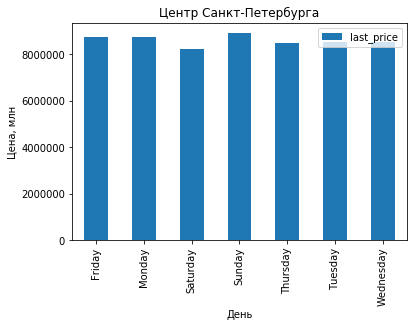

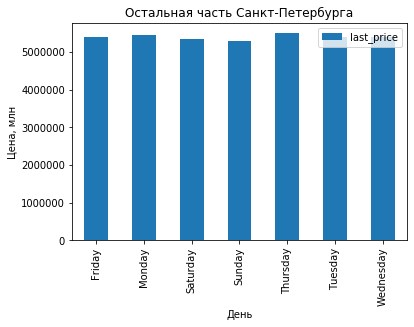

In [70]:
spb_center.pivot_table(index='day', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Центр Санкт-Петербурга')
plt.ylabel('Цена, млн')
plt.xlabel('День')
plt.show()   

spb_stat.pivot_table(index='day', values='last_price', aggfunc = 'median').plot(
    kind='bar', y='last_price', title = 'Остальная часть Санкт-Петербурга')
plt.ylabel('Цена, млн')
plt.xlabel('День')
plt.show()   

В центре города цена от количества комнат зависит меньше, чем в остальной части города.
<br>Стоимость квартир на первом этаже в центре значительно дешевле, чем на других этажах. На последнем этаже квартиры дороже, чем на первом, но все равно ниже, чем на остальных этажах.
<br>При этом в остальной части города стоимость квартиры на последнем и осталных этажах не сильно отличается. Но на первом этаже по-прежнему цена ниже.
<br>В самом центре квартиры дороже, далее в радиусе шести киллометров цена меняетя незначительно.
<br>В семи киллометрах от центра цена резко падает, и постепенно снижается, чем дальше квартира от центра. Есть незначительные повышения на 20-м и 27- киллометрах от центра, но эти данные вероятно нужно более подробно изучить, чтобы понять причину.
<br>В центре, как и в остальной части города, произошло среднее снижение стоимости квартир с 2015 года.
<br>Если рассматривать по месяцам, то видно, что в центре города цены к концу весны снижаются и постепенно к осени повышаются снова. В октябре цены опять ниже, самые низкие цены в декабре.
<br>В остальной части города снижение менее заметное, но тоже происходит в летнее время, а в декабре, наоборот, цена повышается.
По дням недели значительных отличий нет.


## Общий вывод

<br>Мы провели анализ объявлений по квартирам в Ленинградской области и отдельный анализ по объявленями в Санкт-Петербурге. 
В процессе анализа увидели, что часть описаний квартир имеет аномальные показетели - в данных по общей площади, высоте потолков, количеству дней до снятия объявления.
От части аномальных данных мы избавились.
Данные показывают, что основная часть объявлений по квартирам в Ленинградской области от 25 до 100 метров, с количеством комнат до 6, высота потолков до трех метров, стоимостью до 10 млн.руб.
В среднем время продаж квартир около полугода.
Далее провели анализ зависимости стоимости квартир от разных показателей. Выявили, что цена квартиры больше всего зависит от площади. Так же на цену влияет этаж, на котором она расположена, и удаленность от центра
Увидели, что с 2015 года средняя цена квартир резко уменьшилась.
Больше всего объявлений по Санкт-Петербургу и ближайшим к нему населенным пунктам. В них же и самые дорогие квартиры. Самая дешевая стоимость жилья в Выборге.
Анализ по объявлениям Санкт-Петербурга показал, что цены на квартиры, расположенные далее 7 км о центра, значительно снижаются.
Так же и отличается зависимость от цены от разных показателей по квартирам в центре города и в остальной его части.
